In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

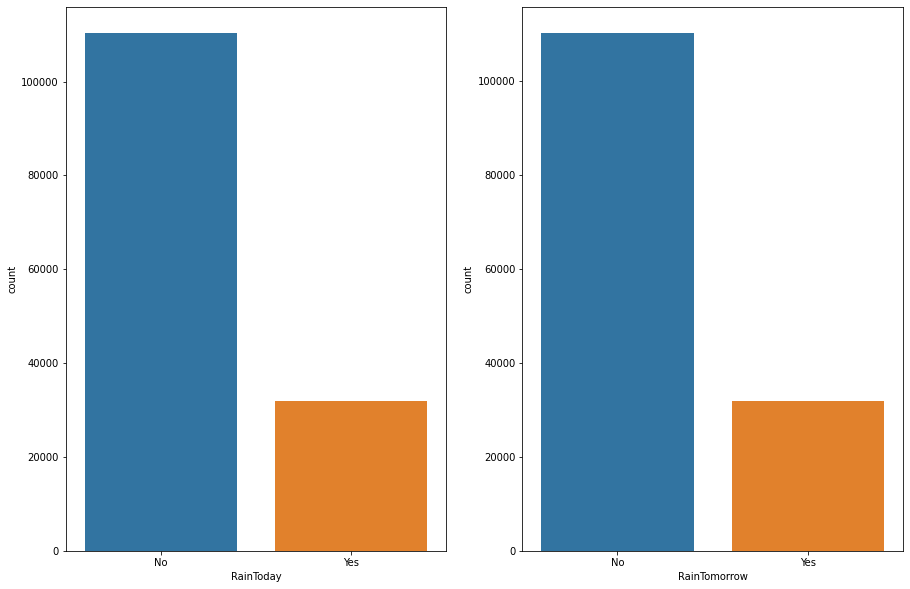

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.countplot(x='RainToday', data=df)
plt.subplot(122)
sns.countplot(x='RainTomorrow', data=df)
plt.show()

In [9]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df.Date.apply(lambda x: x.year)
df['month'] = df.Date.apply(lambda x: x.month)
df['day'] = df.Date.apply(lambda x: x.day)
df.drop(columns=['Date'],axis=1, inplace = True)

# Preview changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [11]:
df_cols=df.select_dtypes(['object']).columns
df[df_cols] = df[df_cols].apply(lambda x: x.str.strip())

In [12]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df.columns=df.columns.str.strip().str.lower()
df

# Preview changes
df.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,albury,13.4,22.9,0.6,NaN,NaN,w,44.0,w,wnw,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,albury,7.4,25.1,0.0,NaN,NaN,wnw,44.0,nnw,wsw,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,albury,12.9,25.7,0.0,NaN,NaN,wsw,46.0,w,wsw,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,albury,9.2,28.0,0.0,NaN,NaN,ne,24.0,se,e,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,albury,17.5,32.3,1.0,NaN,NaN,w,41.0,ene,nw,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


In [13]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
sunshine,69835,0.480098
evaporation,62790,0.431665
cloud3pm,59358,0.408071
cloud9am,55888,0.384216


In [15]:
num_col=df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

21

Text(0.5, 1.0, 'Distribution of MAX Temperature')

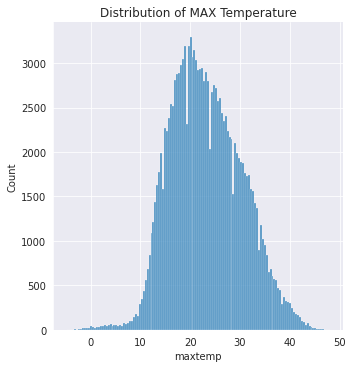

In [16]:
sns.set_style('darkgrid')
sns.displot(df['maxtemp'])
plt.title("Distribution of MAX Temperature")

**Inference**
- Maximum Temperature has maximum concentration between 18 and 12

Text(0.5, 1.0, 'Distribution of MIN Temperature')

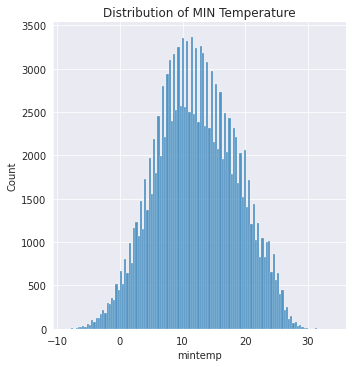

In [17]:
sns.set_style('darkgrid')
sns.displot(df['mintemp'])
plt.title("Distribution of MIN Temperature")

**Inference**
- Minimum Temperature has maximum concentration between 8 and 12

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

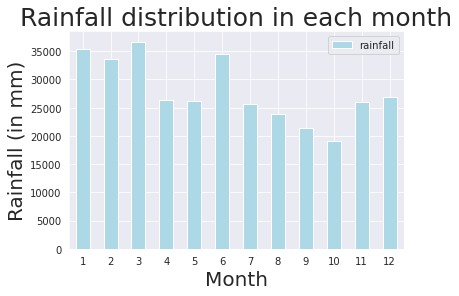

In [18]:
plt.figure(figsize=(8,4))
a = df.groupby('month').agg({'rainfall':'sum'})
a.plot(kind='bar', color ='lightblue')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

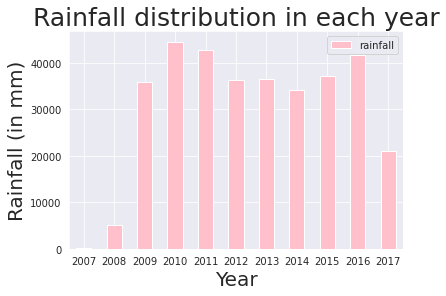

In [19]:
plt.figure(figsize=(8,4))
a = df.groupby('year').agg({'rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wind Direction at 3PM')

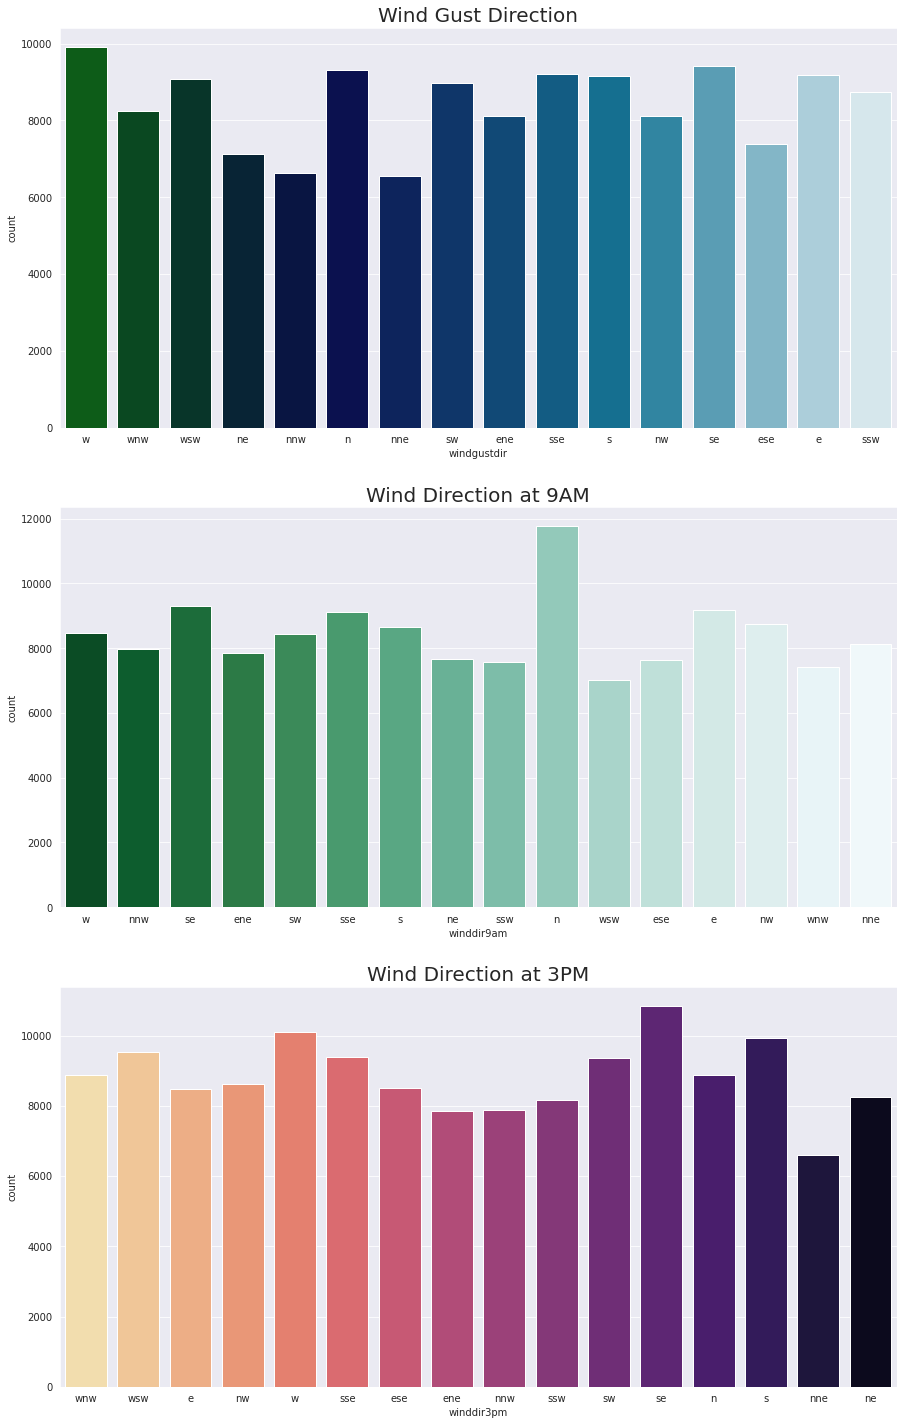

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(15,25))

# WindGustDir
sns.countplot(df['windgustdir'], palette='ocean', ax=ax[0])
ax[0].set_title("Wind Gust Direction", fontsize=20)

# WindGustDir
sns.countplot(df['winddir9am'], palette='BuGn_r', ax=ax[1])
ax[1].set_title("Wind Direction at 9AM", fontsize=20)

# WindGustDir
sns.countplot(df['winddir3pm'], palette='magma_r', ax=ax[2])
ax[2].set_title("Wind Direction at 3PM", fontsize=20)

**Inference**
- Wind Gust Direction for maximum records(nearly 10,000) is West.
- Wind Direction at 9AM for maximum records is North followed by South-East and East.
- Wind Direction at 3PM for maximum records is South East.

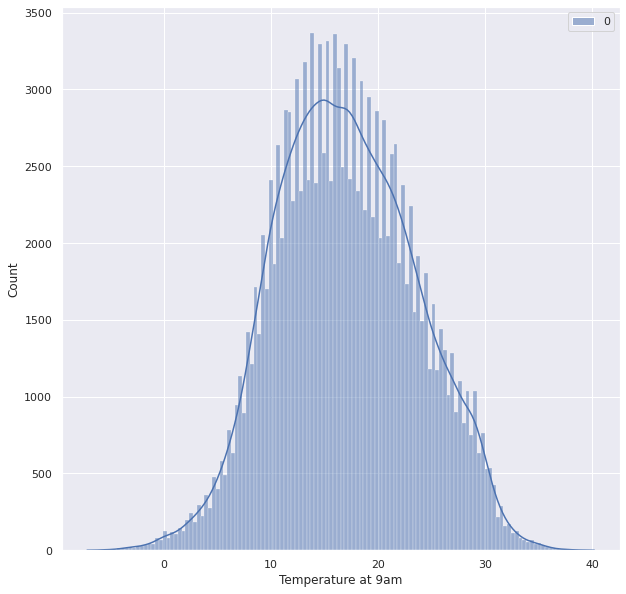

In [26]:
temp9am_array = df[['temp9am']].to_numpy()
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.histplot(data=temp9am_array,kde=True)
plt.xlabel("Temperature at 9am")
fig.set_size_inches(10, 10)
plt.show()

**Inference**
- Normal distribution
- No outliers

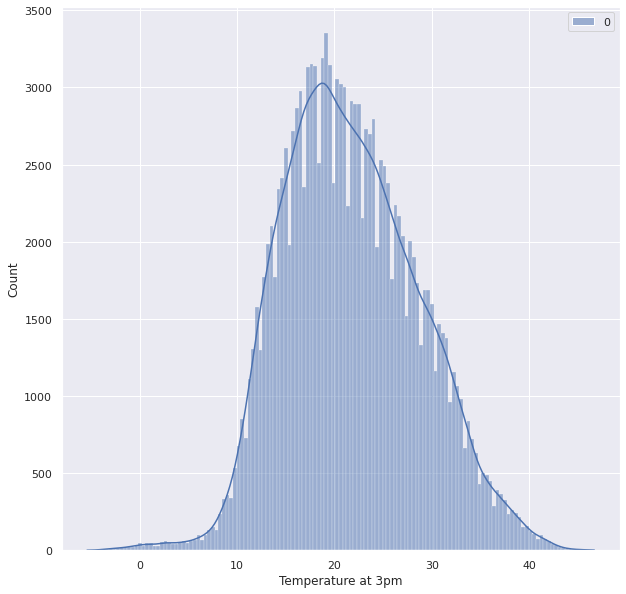

In [27]:
temp3pm_array = df[['temp3pm']].to_numpy()
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.histplot(data=temp3pm_array,kde=True)
plt.xlabel("Temperature at 3pm")
fig.set_size_inches(10, 10)
plt.show()

**Inference**
- Normal distribution
- No outliers

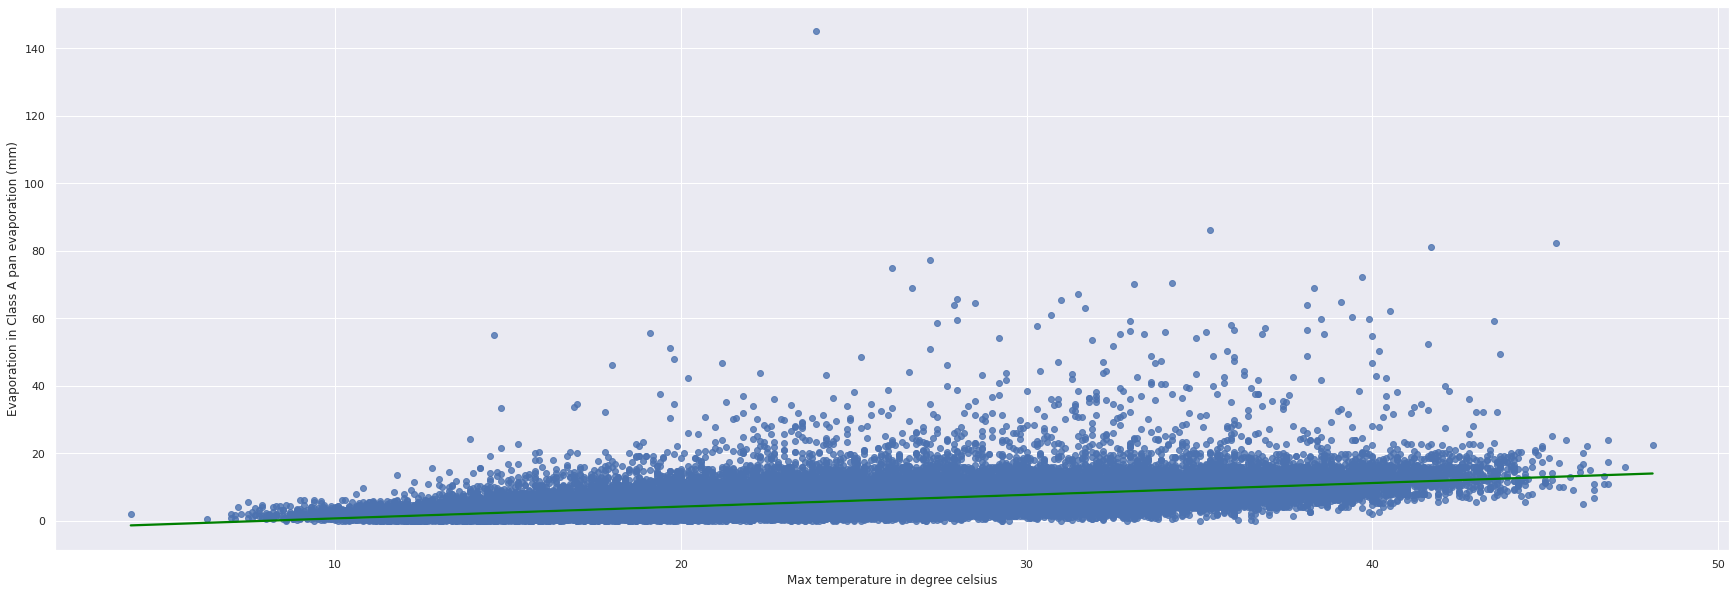

In [23]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["maxtemp"], y=df["evaporation"],line_kws={"color": "green"})
plt.xlabel("Max temperature in degree celsius")
plt.ylabel("Evaporation in Class A pan evaporation (mm)")
fig.set_size_inches(30, 10)
plt.show()

**Inference**
- Positive Correlation between Max Temperature and Evaporation.
- Higher the Max Temperature, higher the value of Evaporation.

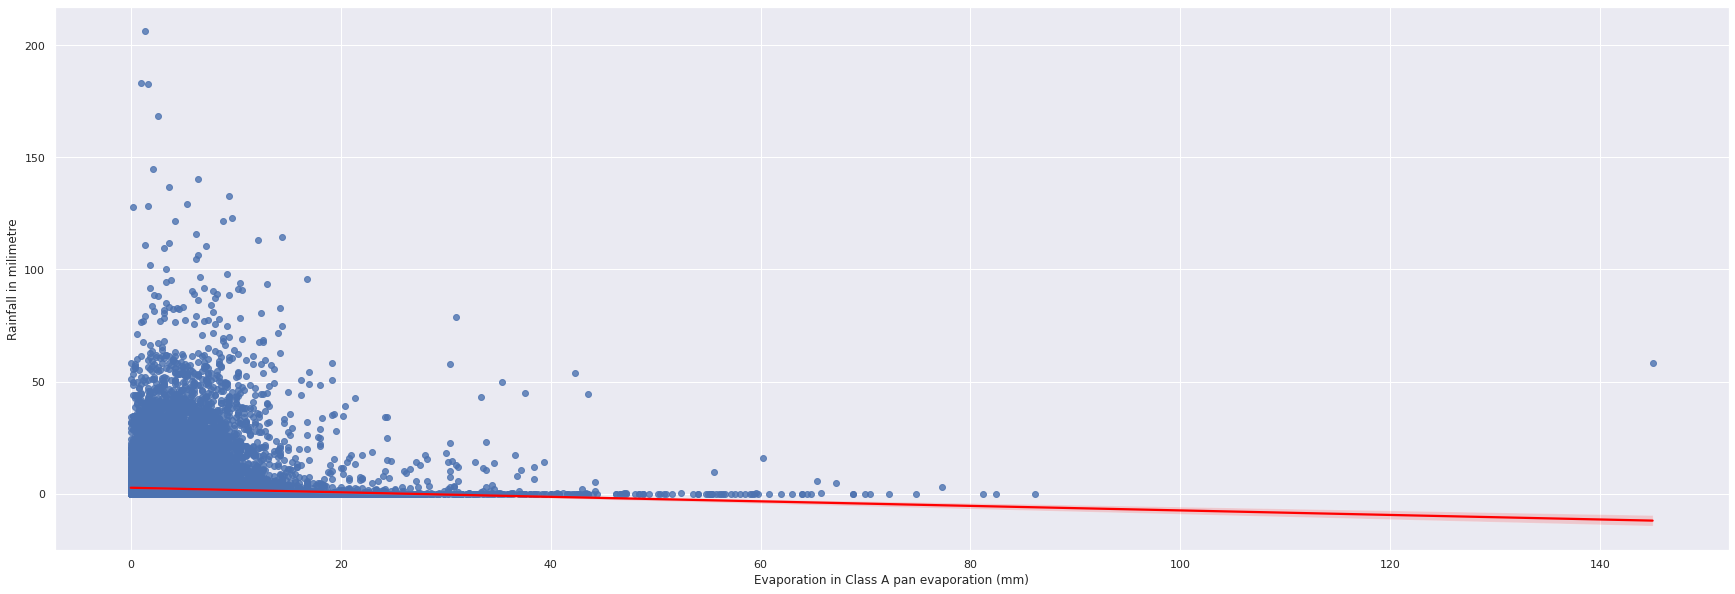

In [24]:
# use the function regplot to make a scatterplot
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["evaporation"], y=df["rainfall"],line_kws={"color": "red"})
plt.xlabel("Evaporation in Class A pan evaporation (mm)")
plt.ylabel("Rainfall in milimetre")
fig.set_size_inches(30, 10)
plt.show()

**Inference**
- Negative Correlation between Evaporation and Rainfall.
- Majority rainfall data between 0 and 30.
- There are different factors affecting rainfall other than evaporation.

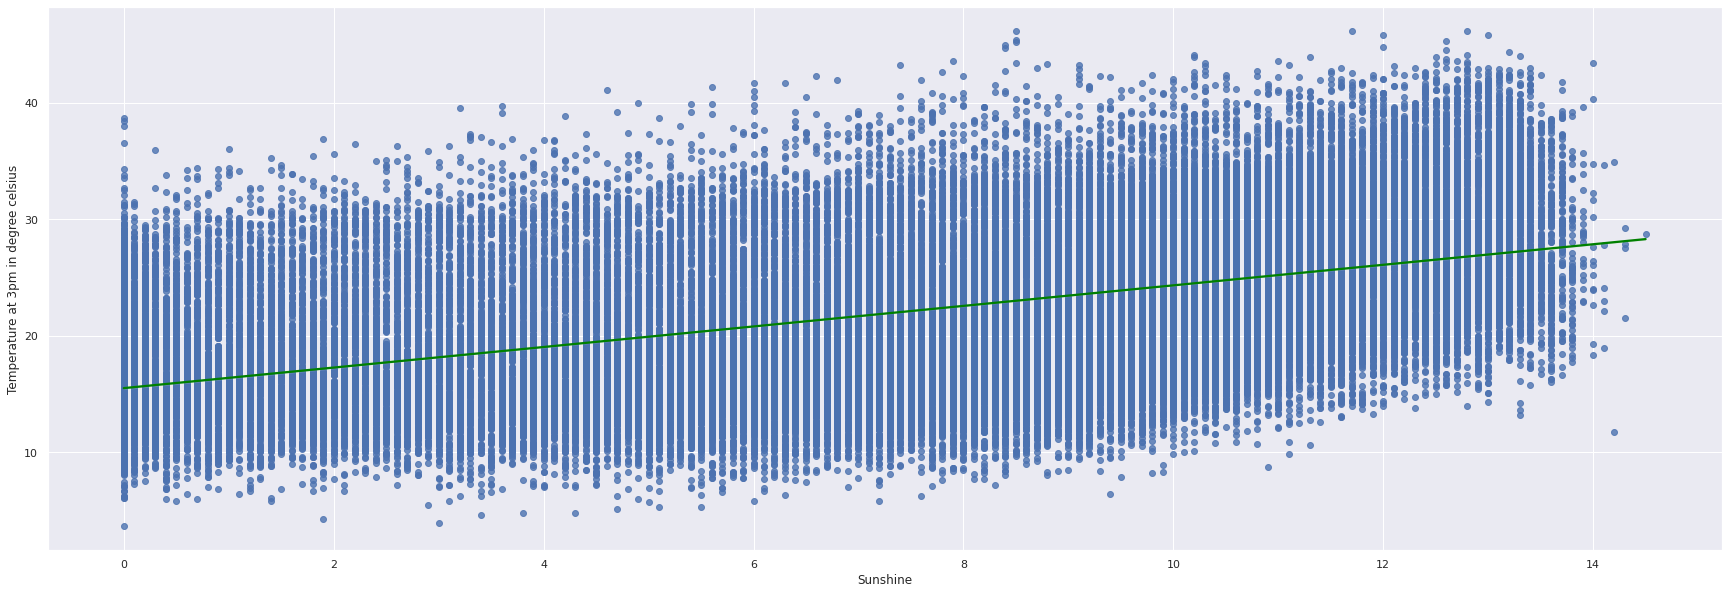

In [25]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["sunshine"], y=df["temp3pm"],line_kws={"color": "green"})
plt.xlabel("Sunshine")
plt.ylabel("Temperature at 3pm in degree celsius")
fig.set_size_inches(30, 10)
plt.show()

**Inference:** 
- Positive Correlation between Sunshine and Temperature at 3pm. 
- More sunshine, higher the temperature at 3pm.


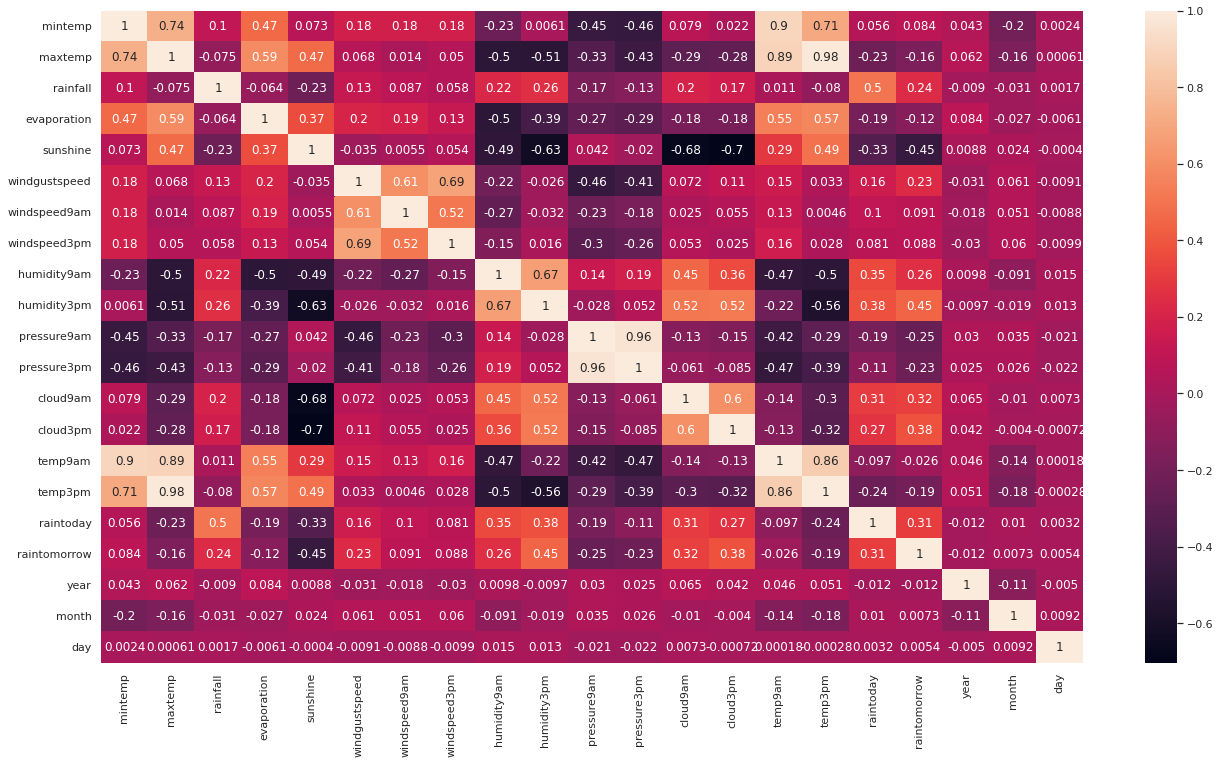

In [30]:
corr = df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr,annot=True)